In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
sns.set_style("darkgrid")
import statsmodels.formula.api as smf

In [2]:
#Import Yelp Dataset
data = pd.read_csv('https://raw.githubusercontent.com/vc1492a/Yelp-Challenge-Dataset/master/Prepped%20Data/output.csv')
data.iloc[0:6,]

,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,type,...,Pakistani,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes
0,5UmKMjUEUNdYWqANhGckJw,Dravosburg,"4734 Lebanon Church Rd Dravosburg, PA 15034",40.354327,-79.900706,Mr Hoagie,4,4.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
1,UsFtqoBl7naz8AVUBZMjQQ,Dravosburg,"202 McClure St Dravosburg, PA 15034",40.350553,-79.886814,Clancy's Pub,4,3.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
2,3eu6MEFlq2Dg7bQh8QbdOg,Dravosburg,"1 Ravine St Dravosburg, PA 15034",40.350956,-79.889059,Joe Cislo's Auto,3,5.0,PA,business,...,0,0,0,0,0,0,0,0,0,0
3,cE27W9VPgO88Qxe4ol6y_g,Bethel Park,"1530 Hamilton Rd Bethel Park, PA 15234",40.354116,-80.014660,Cool Springs Golf Center,5,2.5,PA,business,...,0,0,0,0,0,0,0,9,1,0
4,HZdLhv6COCleJMo7nPl-RA,Pittsburgh,"301 South Hills Village Pittsburgh, PA 15241",40.357620,-80.059980,Verizon,5,2.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
5,mVHrayjG3uZ_RLHkLj-AMg,rankin,"414 Hawkins Ave rankin, PA 15104",40.413464,-79.880247,Emil's Lounge,20,5.0,PA,business,...,0,0,0,0,0,0,0,23,1,1


In [3]:
print data.shape

(72742, 89)


## Understanding the Dataset

 FieldName|Type|Description
 ---------|----|-----------
business_id|integer (0 or 1)|business_id
city|string|city
full_address|string|full_address
latitude|double|latitude
longitude|double|longitude
name|string|name of restaurant
review_count|integer|number of reviews
stars|double (rounded to nearest 0.5)|rating of the restaurant
state|string|state
type|string|all of these are labeled as business
Sunday_Open|double (time)|Sunday_Open
Sunday_Close|double (time)|Sunday_Close
Monday_Open|double (time)|Monday_Open
Monday_Close|double (time)|Monday_Close
Tuesday_Open|double (time)|Tuesday_Open
Tuesday_Close|double (time)|Tuesday_Close
Wednesday_Open|double (time)|Wednesday_Open
Wednesday_Close|double (time)|Wednesday_Close
Thursday_Open|double (time)|Thursday_Open
Thursday_Close|double (time)|Thursday_Close
Friday_Open|double (time)|Friday_Open
Friday_Close|double (time)|Friday_Close
Saturday_Open|double (time)|Saturday_Open
Saturday_Close|double (time)|Saturday_Close
Noise Level|string|Average, Quiet, Loud, Very Loud
Attire|string|Casual, Dressy, Formal
Alcohol|string|Full Bar, Beer and Wine, None
Price_Range|integer (1 to 4)|1 (cheap) to 4 (expensive)
Delivery|integer (0 or 1)|0 = N, 1 = Y
Outdoor_Seating|integer (0 or 1)|0 = N, 1 = Y
Drive-Thru|integer (0 or 1)|0 = N, 1 = Y
Good_for_Groups|integer (0 or 1)|0 = N, 1 = Y
Has_TV|integer (0 or 1)|0 = N, 1 = Y
Caters|integer (0 or 1)|0 = N, 1 = Y
Waiter_Service|integer (0 or 1)|0 = N, 1 = Y
Good_for_Kids|integer (0 or 1)|0 = N, 1 = Y
Accepts_Credit_Cards|integer (0 or 1)|0 = N, 1 = Y
Takes_Reservations|integer (0 or 1)|0 = N, 1 = Y
Wi_Fi|string|No, Free, Paid
Happy_Hour|integer (0 or 1)|0 = N, 1 = Y
Good_for_Dancing|integer (0 or 1)|0 = N, 1 = Y
Smoking|integer (0 or 1)|Outdoor, No, Yes
BYOB|integer (0 or 1)|0 = N, 1 = Y
Corkage|integer (0 or 1)|0 = N, 1 = Y
Take_Out|integer (0 or 1)|0 = N, 1 = Y
Coat_Check|integer (0 or 1)|0 = N, 1 = Y
Parking_Street|integer (0 or 1)|0 = N, 1 = Y
Parking_Valet|integer (0 or 1)|0 = N, 1 = Y
Parking_Lot|integer (0 or 1)|0 = N, 1 = Y
Parking_Garage|integer (0 or 1)|0 = N, 1 = Y
Parking_Validated|integer (0 or 1)|0 = N, 1 = Y
Music_DJ|integer (0 or 1)|0 = N, 1 = Y
Music_Karaoke|integer (0 or 1)|0 = N, 1 = Y
Music_Video|integer (0 or 1)|0 = N, 1 = Y
Music_Live|integer (0 or 1)|0 = N, 1 = Y
Music_Jukebox|integer (0 or 1)|0 = N, 1 = Y
Music_Background_Music|integer (0 or 1)|0 = N, 1 = Y
Is_Restaurants|integer (0 or 1)|0 = N, 1 = Y (is it a restaurant)
Sandwiches|integer (0 or 1)|0 = N, 1 = Y
Fast Food|integer (0 or 1)|0 = N, 1 = Y
Nightlife|integer (0 or 1)|0 = N, 1 = Y
Pizza|integer (0 or 1)|0 = N, 1 = Y
Bars|integer (0 or 1)|0 = N, 1 = Y
Mexican|integer (0 or 1)|0 = N, 1 = Y
Food|integer (0 or 1)|0 = N, 1 = Y
American (Traditional)|integer (0 or 1)|0 = N, 1 = Y
Burgers|integer (0 or 1)|0 = N, 1 = Y
Chinese|integer (0 or 1)|0 = N, 1 = Y
Italian|integer (0 or 1)|0 = N, 1 = Y
American (New)|integer (0 or 1)|0 = N, 1 = Y
Breakfast & Brunch|integer (0 or 1)|0 = N, 1 = Y
Thai|integer (0 or 1)|0 = N, 1 = Y
Indian|integer (0 or 1)|0 = N, 1 = Y
Sushi Bars|integer (0 or 1)|0 = N, 1 = Y
Korean|integer (0 or 1)|0 = N, 1 = Y
Mediterranean|integer (0 or 1)|0 = N, 1 = Y
Japanese|integer (0 or 1)|0 = N, 1 = Y
Seafood|integer (0 or 1)|0 = N, 1 = Y
Middle Eastern|integer (0 or 1)|0 = N, 1 = Y
Pakistani|integer (0 or 1)|0 = N, 1 = Y
Barbeque|integer (0 or 1)|0 = N, 1 = Y
Vietnamese|integer (0 or 1)|0 = N, 1 = Y
Asian Fusion|integer (0 or 1)|0 = N, 1 = Y
Diners|integer (0 or 1)|0 = N, 1 = Y
Greek|integer (0 or 1)|0 = N, 1 = Y
Vegetarian|integer (0 or 1)|0 = N, 1 = Y
Number_of_Checkins|integer|Number_of_Checkins
Number_of_Tips|integer|Number_of_Tips
Number_of_Tip_Likes|integer (0 to 18)|Number_of_Tip_Like

In [4]:
#Keep only restaurants
data_rest = data[data["Is_Restaurants"] == 1]
data_rest.shape

(22264, 89)

In [10]:
#Keep only columns I hypothesize might be important for predicting rating
cols_to_keep = ['stars','state', 'review_count','Noise Level', 'Attire', 'Price_Range', 'Delivery', 'Good_for_Groups', 'Waiter_Service','Number_of_Checkins','Take_Out','Number_of_Tips']
data1 = data_rest[cols_to_keep]
data1.head()

,stars,state,review_count,Noise Level,Attire,Price_Range,Delivery,Good_for_Groups,Waiter_Service,Number_of_Checkins,Take_Out,Number_of_Tips
0,4.5,PA,4,average,casual,1.0,0.0,1.0,0.0,0,1.0,0
5,5.0,PA,20,average,casual,1.0,0.0,1.0,1.0,23,1.0,1
7,4.0,PA,21,loud,casual,1.0,0.0,1.0,1.0,55,1.0,2
14,3.5,PA,8,NaN,casual,1.0,0.0,1.0,1.0,15,1.0,1
18,4.0,PA,7,average,casual,1.0,0.0,1.0,1.0,11,1.0,2


In [7]:
#Check number of states
data1["state"].value_counts()

AZ     8857
NV     5518
NC     2239
PA     1549
EDH    1155
WI     1103
QC      611
BW      395
ON      323
IL      299
SC      124
MLN      71
ELN       7
RP        5
FIF       3
KHL       1
NW        1
NM        1
TX        1
Name: state, dtype: int64

In [11]:
#Keep only 5 largest states
data2 = data1[data1["state"].isin(["AZ", "NC", "NV","PA", "WI"])]

In [13]:
#Check for null data
data2.isnull().sum()

stars                    0
state                    0
review_count             0
Noise Level           3927
Attire                1125
Price_Range            862
Delivery              1505
Good_for_Groups       1016
Waiter_Service        2477
Number_of_Checkins       0
Take_Out              1100
Number_of_Tips           0
dtype: int64

In [14]:
#Drop rows where data is null
data3 = data2.dropna()
data3.isnull().sum()

stars                 0
state                 0
review_count          0
Noise Level           0
Attire                0
Price_Range           0
Delivery              0
Good_for_Groups       0
Waiter_Service        0
Number_of_Checkins    0
Take_Out              0
Number_of_Tips        0
dtype: int64

In [15]:
#Describe data
data3.describe()

,stars,review_count,Price_Range,Delivery,Good_for_Groups,Waiter_Service,Number_of_Checkins,Take_Out,Number_of_Tips
count,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000
mean,3.494834,91.666387,1.567818,0.183665,0.906736,0.588761,278.991763,0.947644,23.304014
std,0.677748,182.652176,0.608361,0.387224,0.290812,0.492076,602.432149,0.222752,44.632931
min,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,17.000000,1.000000,0.000000,1.000000,0.000000,36.000000,1.000000,4.000000
50%,3.500000,42.000000,2.000000,0.000000,1.000000,1.000000,102.000000,1.000000,10.000000
75%,4.000000,98.000000,2.000000,0.000000,1.000000,1.000000,278.000000,1.000000,25.000000
max,5.000000,5642.000000,4.000000,1.000000,1.000000,1.000000,16641.000000,1.000000,1148.000000


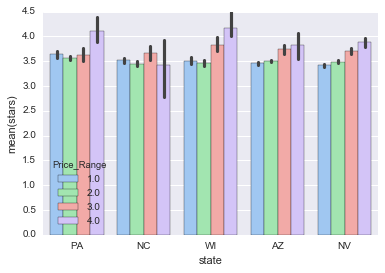

In [53]:
#plot ratings by state and price range
sb.barplot(x="state", y="stars",hue="Price_Range", data=data3, palette = "pastel")

In [21]:
from collections import Counter
Counter(data3["stars"])

Counter({1.0: 23,
         1.5: 164,
         2.0: 482,
         2.5: 1296,
         3.0: 2606,
         3.5: 4197,
         4.0: 4000,
         4.5: 1404,
         5.0: 153})

(array([   23.,   164.,   482.,  1296.,     0.,  2606.,  4197.,  4000.,
         1404.,   153.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

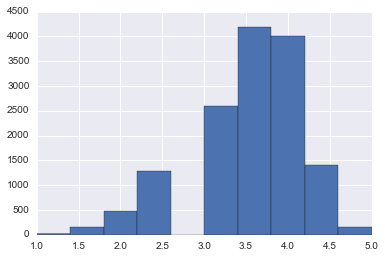

In [22]:
#look at distribution of ratings
plt.hist(data3["stars"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126d22cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127d457d0>]], dtype=object)

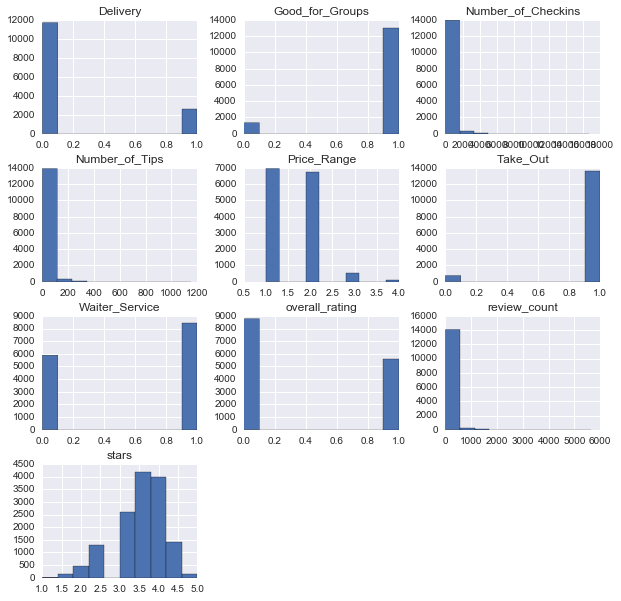

In [42]:
#look at distribution of other variables
data3.hist(figsize=(10,10))

In [33]:
#Create a broader ratings category (more evenly distributed)
data3["overall_rating"]=data3["stars"].apply(lambda x: 1 if x>3.5 else 0)

/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
data3["overall_rating"].value_counts()

0    8768
1    5557
Name: overall_rating, dtype: int64

In [71]:
data3["Noise Level"].value_counts()

average      9905
quiet        3037
loud         1003
very_loud     380
Name: Noise Level, dtype: int64

In [74]:
data3["Attire"].value_counts()

casual    13938
dressy      374
formal       13
Name: Attire, dtype: int64

In [77]:
#convert noise level into numbers
#convert attire into numbers

data3['noise'] = 1
data3['noise'][data3["Noise Level"] == "average"] = 2
data3['noise'][data3["Noise Level"] == "loud"] = 3
data3['noise'][data3["Noise Level"] == "very_loud"] = 4
data3['attire'] = 2
data3['attire'][data3["Attire"] == "casual"]  = 1

data3.head()

/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__ma

,stars,state,review_count,Noise Level,Attire,Price_Range,Delivery,Good_for_Groups,Waiter_Service,Number_of_Checkins,Take_Out,Number_of_Tips,overall_rating,log_tips,log_reviews,log_checkins,noise,attire
0,4.5,PA,4,average,casual,1.0,0.0,1.0,0.0,0,1.0,0,1,-inf,1.386294,-inf,2,1
5,5.0,PA,20,average,casual,1.0,0.0,1.0,1.0,23,1.0,1,1,0.000000,2.995732,3.135494,2,1
7,4.0,PA,21,loud,casual,1.0,0.0,1.0,1.0,55,1.0,2,1,0.693147,3.044522,4.007333,3,1
18,4.0,PA,7,average,casual,1.0,0.0,1.0,1.0,11,1.0,2,1,0.693147,1.945910,2.397895,2,1
19,4.5,PA,58,average,casual,1.0,0.0,0.0,1.0,108,1.0,5,1,1.609438,4.060443,4.682131,2,1


## Look at relationships between variables

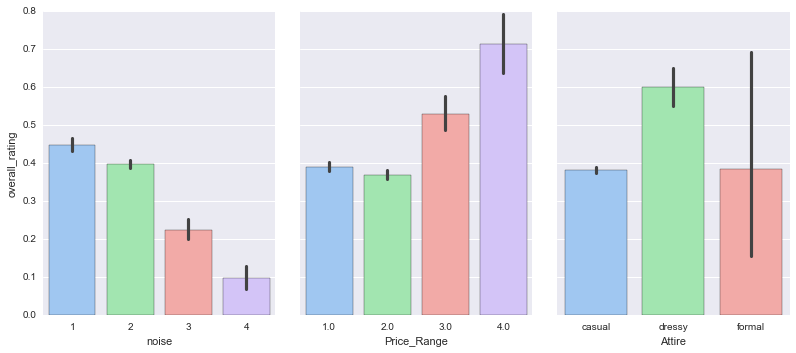

In [79]:
g = sb.PairGrid(data3, x_vars=["noise", "Price_Range", "Attire"],
                y_vars =["overall_rating"],
               aspect = .75, size = 5)

g.map(sb.barplot, palette = "pastel");

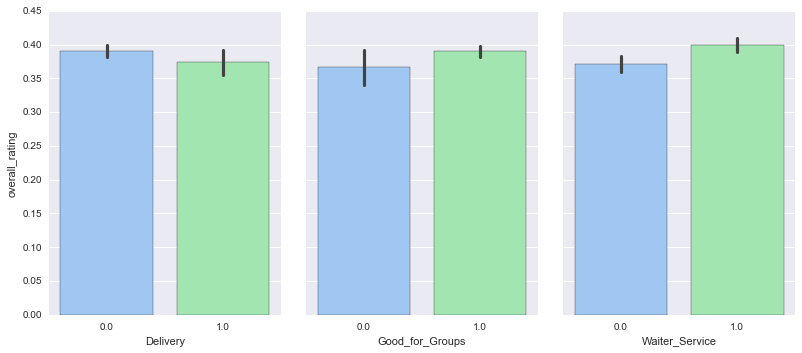

In [36]:
g = sb.PairGrid(data3, x_vars=["Delivery", "Good_for_Groups", "Waiter_Service"],
                y_vars =["overall_rating"],
               aspect = .75, size = 5)

g.map(sb.barplot, palette = "pastel");

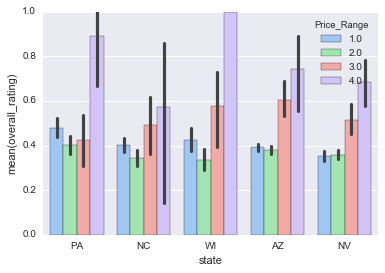

In [52]:
sb.barplot(x="state", y="overall_rating",hue="Price_Range", data=data3, palette = "pastel")

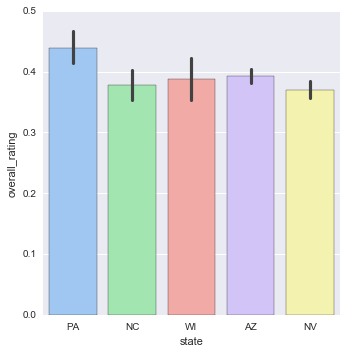

In [51]:
g = sb.PairGrid(data3, x_vars=["state"],
                y_vars =["overall_rating"],
               size = 5)

g.map(sb.barplot, palette = "pastel");

In [46]:
data3["log_tips"]=np.log(data3["Number_of_Tips"])
data3["log_reviews"]=np.log(data3["review_count"])
data3["log_checkins"]=np.log(data3["Number_of_Checkins"])

/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [47]:
data3.head()

,stars,state,review_count,Noise Level,Attire,Price_Range,Delivery,Good_for_Groups,Waiter_Service,Number_of_Checkins,Take_Out,Number_of_Tips,overall_rating,log_tips,log_reviews,log_checkins
0,4.5,PA,4,average,casual,1.0,0.0,1.0,0.0,0,1.0,0,1,-inf,1.386294,-inf
5,5.0,PA,20,average,casual,1.0,0.0,1.0,1.0,23,1.0,1,1,0.000000,2.995732,3.135494
7,4.0,PA,21,loud,casual,1.0,0.0,1.0,1.0,55,1.0,2,1,0.693147,3.044522,4.007333
18,4.0,PA,7,average,casual,1.0,0.0,1.0,1.0,11,1.0,2,1,0.693147,1.945910,2.397895
19,4.5,PA,58,average,casual,1.0,0.0,0.0,1.0,108,1.0,5,1,1.609438,4.060443,4.682131


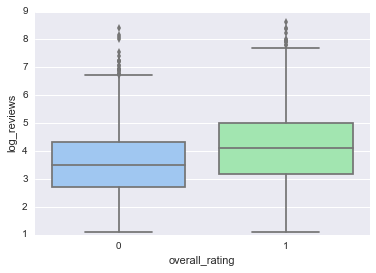

In [55]:
sb.boxplot(x="overall_rating", y="log_reviews", data=data3, palette = "pastel");

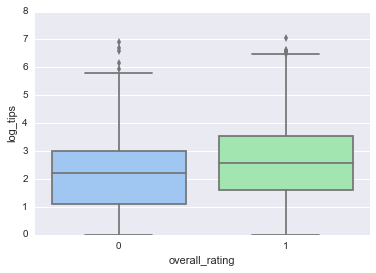

In [56]:
sb.boxplot(x="overall_rating", y="log_tips", data=data3, palette = "pastel");

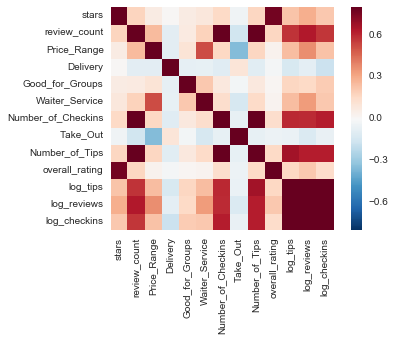

In [58]:
#Check correlations. Noticed that reviews, tips, and checkins are extremely correlated, so probably don't need all three of them in my analysis.
corrmat = data3.corr()
sb.heatmap(corrmat, vmax=.8, square=True)

## Run logistic regression

In [94]:
# create a clean data frame for the regression & create dummy variables for categorical variables
cols_to_keep = ['overall_rating', 'log_reviews']


dummy_delivery = pd.get_dummies(data3['Delivery'],prefix="deliv")
dummy_groups = pd.get_dummies(data3['Good_for_Groups'],prefix="groups")
dummy_waiter = pd.get_dummies(data3['Waiter_Service'],prefix="waiter")
dummy_takeout = pd.get_dummies(data3['Take_Out'],prefix="takeout")
dummy_price = pd.get_dummies(data3['Price_Range'],prefix="price")
dummy_noise = pd.get_dummies(data3['noise'],prefix="noise")
dummy_attire = pd.get_dummies(data3['attire'],prefix="attire")


lreg_data = data3[cols_to_keep].join(dummy_delivery.ix[:, 'deliv_1.0':])
lreg_data = lreg_data.join(dummy_groups.ix[:, 'groups_1.0':])
lreg_data = lreg_data.join(dummy_waiter.ix[:, 'waiter_1.0':])
lreg_data = lreg_data.join(dummy_takeout.ix[:, 'takeout_1.0':])
lreg_data = lreg_data.join(dummy_price.ix[:, 'price_2.0':'price_4.0'])
lreg_data = lreg_data.join(dummy_noise.ix[:, 'noise_1': 'noise_3'])
lreg_data = lreg_data.join(dummy_attire.ix[:, :'attire_1'])

lreg_data.head()


,overall_rating,log_reviews,deliv_1.0,groups_1.0,waiter_1.0,takeout_1.0,price_2.0,price_3.0,price_4.0,noise_1,noise_2,noise_3,attire_1
0,1,1.386294,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,1,2.995732,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,1,3.044522,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
18,1,1.945910,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19,1,4.060443,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [95]:
# manually add the intercept
lreg_data['intercept'] = 1.0
train_cols = lreg_data.columns[1:]

In [106]:
logit = smf.Logit(lreg_data['overall_rating'],lreg_data[train_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.625698
         Iterations 6


In [107]:
print logit.summary()

                           Logit Regression Results                           
Dep. Variable:         overall_rating   No. Observations:                14325
Model:                          Logit   Df Residuals:                    14312
Method:                           MLE   Df Model:                           12
Date:                Sun, 14 May 2017   Pseudo R-squ.:                 0.06306
Time:                        16:47:00   Log-Likelihood:                -8963.1
converged:                       True   LL-Null:                       -9566.4
                                        LLR p-value:                6.838e-251
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
log_reviews     0.4593      0.017     26.363      0.000         0.425     0.493
deliv_1.0      -0.0810      0.047     -1.720      0.085        -0.173     0.011
groups_1.0     -0.0695      0.064     -1.079    

In [108]:
#calculate odds ratio
print (np.exp(logit.params))

log_reviews    1.582925
deliv_1.0      0.922196
groups_1.0     0.932866
waiter_1.0     0.941111
takeout_1.0    0.910301
price_2.0      0.665857
price_3.0      0.878144
price_4.0      1.674093
noise_1        7.573747
noise_2        4.627469
noise_3        2.309629
attire_1       0.822672
intercept      0.041202
dtype: float64


In [100]:
from sklearn import grid_search, cross_validation
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

gs = grid_search.GridSearchCV(
    estimator = LogisticRegression(), 
    param_grid = param_grid,
    scoring = 'roc_auc',
    cv = 5)
gs.fit(lreg_data[train_cols], lreg_data['overall_rating'])

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   8.48343e-05,   7.19686e-04,   6.10540e-03,
         5.17947e-02,   4.39397e-01,   3.72759e+00,   3.16228e+01,
         2.68270e+02,   2.27585e+03,   1.93070e+04,   1.63789e+05,
         1.38950e+06,   1.17877e+07,   1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [101]:
print gs.best_score_ 

0.66176998203


In [114]:
gs.best_estimator_.coef_

array([[ 0.4592613 , -0.08096728, -0.06945105, -0.06068599, -0.09415642,
        -0.40670162, -0.13037208,  0.51470305,  2.02348772,  1.53083957,
         0.83588869, -0.19587437, -1.59362293]])

In [115]:
logit.params

log_reviews    0.459275
deliv_1.0     -0.080997
groups_1.0    -0.069493
waiter_1.0    -0.060695
takeout_1.0   -0.093980
price_2.0     -0.406680
price_3.0     -0.129945
price_4.0      0.515272
noise_1        2.024688
noise_2        1.532010
noise_3        0.837087
attire_1      -0.195197
intercept     -3.189277
dtype: float64

In [128]:
lreg_data2 = lreg_data.join(dummy_price.ix[:, 'price_1.0':'price_1.0'])
lreg_data2 = lreg_data2.join(dummy_noise.ix[:, 'noise_4':'noise_4'])
lreg_data2['probability'] = gs.predict_proba(lreg_data[train_cols]).T[1]

In [129]:
features1 = ['price_1.0', 'price_2.0', 'price_3.0', 'price_4.0', 'log_reviews']
print features1

features2 = ['noise_1', 'noise_2', 'noise_3', 'noise_4', 'log_reviews']
print features2

['price_1.0', 'price_2.0', 'price_3.0', 'price_4.0', 'log_reviews']
['noise_1', 'noise_2', 'noise_3', 'noise_4', 'log_reviews']


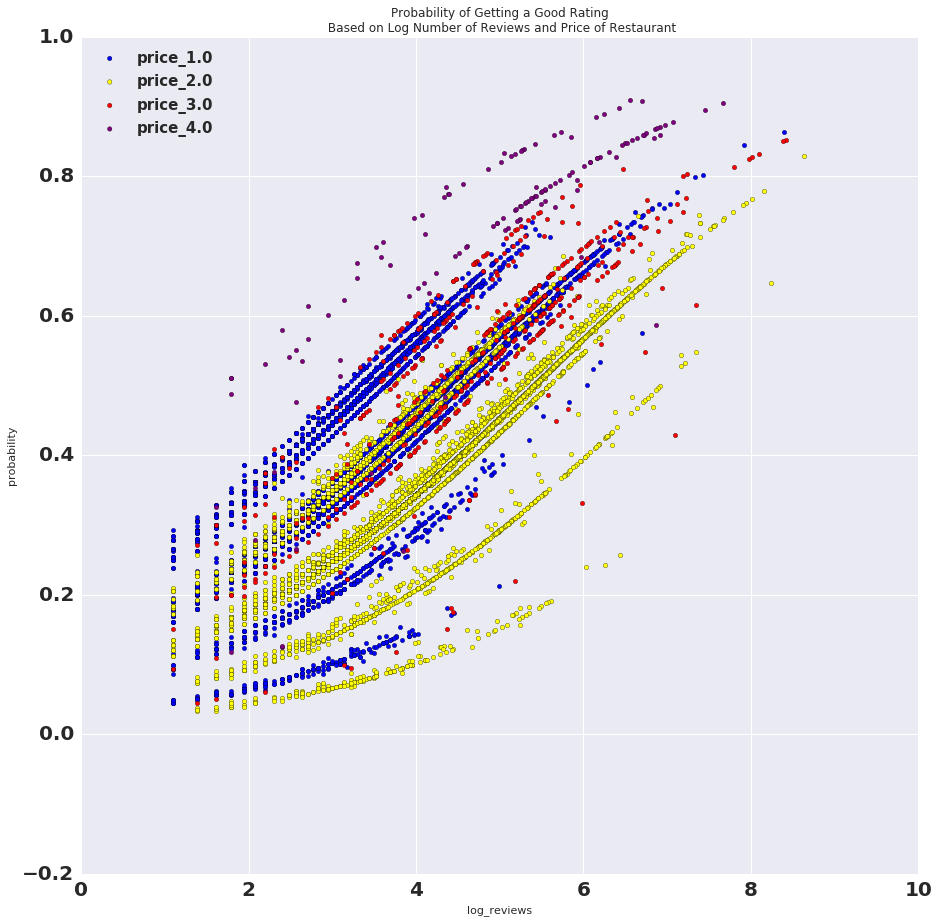

In [134]:
ax1 = plt.subplot(111)
colors = ['blue', 'yellow', 'red', 'purple']
for e, color in enumerate(colors):
    lreg_data2[lreg_data2[features1[e]] == 1].plot(x='log_reviews', y='probability', kind='scatter', c=color, ax=ax1, figsize=(15,15))
ax1.set(title='Probability of Getting a Good Rating\n Based on Log Number of Reviews and Price of Restaurant')

lines, labels = ax1.get_legend_handles_labels()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 22}

plt.rc('font', **font)
# ax1.suptitle('test title', fontsize=20)
ax1.legend(lines[:2], labels=features, loc='upper left',fontsize=15)  # legend for first two lines only

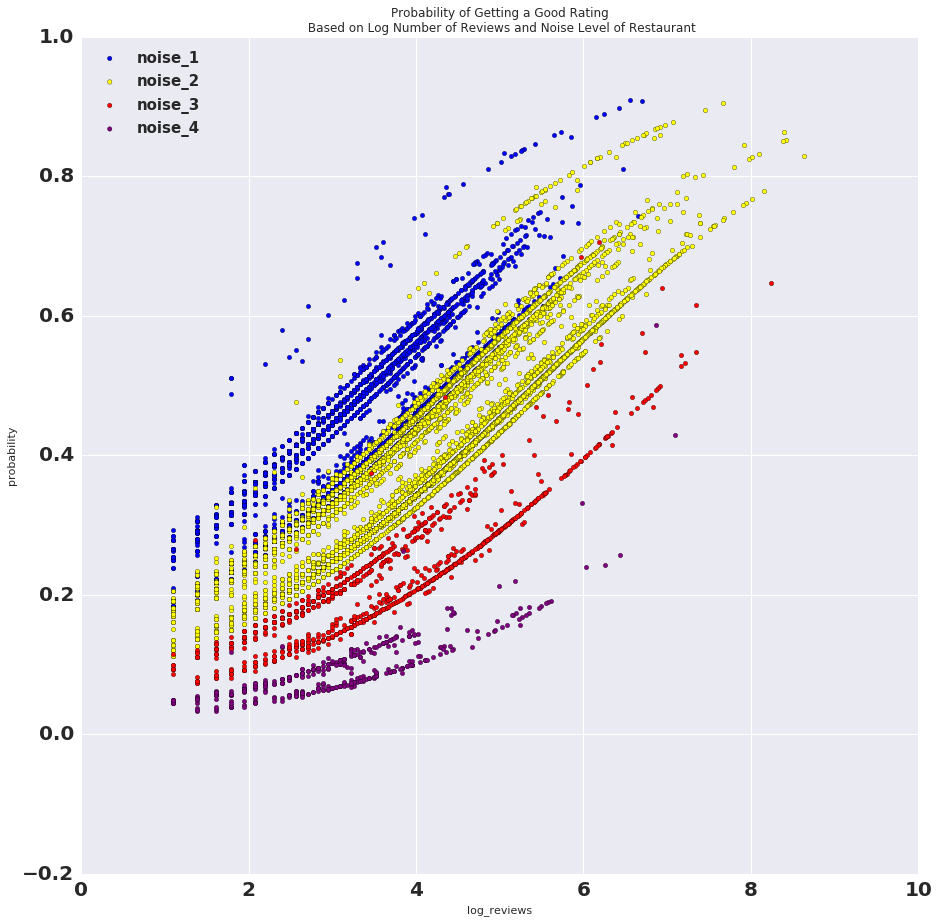

In [135]:
ax1 = plt.subplot(111)
colors = ['blue', 'yellow', 'red', 'purple']
for e, color in enumerate(colors):
    lreg_data2[lreg_data2[features2[e]] == 1].plot(x='log_reviews', y='probability', kind='scatter', c=color, ax=ax1, figsize=(15,15))
ax1.set(title='Probability of Getting a Good Rating\n Based on Log Number of Reviews and Noise Level of Restaurant')

lines, labels = ax1.get_legend_handles_labels()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 22}

plt.rc('font', **font)
# ax1.suptitle('test title', fontsize=20)
ax1.legend(lines[:2], labels=features2, loc='upper left',fontsize=15)  # legend for first two lines only